In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [38]:
data=pd.read_excel('data.xlsx')
data.columns=[col.replace(' ','_') for col in data.columns]
data.columns=[col.replace("'",'') for col in data.columns]
data.columns=[col.replace("%",'') for col in data.columns]

data.ID_Block=data.ID_Block.replace('A',0)
data.ID_Block=data.ID_Block.replace('B',1)

In [39]:
data

,ID_Block,ID_Tretment,ID_Type,runoff_TSS_Sum,runoff_P_Total_sum,runoff_N_Ammonia_sum,soil__Organic_matter,soil_Soil_infiltration,soil_Soil_moisture_upto_15,soil_Soil_moisture_upto_30,plant_Plant__cover,plant_Plant_biomass_gr,plant_Plant_height_m,plant_Plant_diversity,plant_Plan_richness
0,0,1,long,30550.0,8.20,0.00,1.316667,NaN,42.55,32.55,98.000000,NaN,107.000000,9.600000,23.000000
1,0,2,short,2700.6,0.40,6.00,1.240000,NaN,34.00,28.70,90.833333,NaN,57.336667,8.000000,19.833333
2,0,3,control,39977.7,0.41,4.60,1.240000,NaN,50.55,29.25,0.000000,NaN,0.000000,0.000000,0.000000
3,0,4,short,0.0,0.00,0.00,1.093333,NaN,39.00,21.95,100.000000,NaN,62.985000,7.666667,20.333333
4,0,5,control,67838.3,0.70,5.10,1.140000,NaN,52.10,27.15,0.000000,NaN,0.000000,0.000000,0.000000
5,0,6,long,4186.9,0.80,11.30,1.156667,NaN,37.40,23.20,89.166667,NaN,11.158333,6.833333,15.166667
6,0,7,short,3475.0,1.50,0.00,1.270000,NaN,26.80,22.30,87.500000,NaN,0.915000,6.500000,13.666667
7,0,8,long,1570.6,0.80,5.80,1.110000,NaN,38.00,26.60,66.666667,NaN,0.663333,5.833333,9.666667
8,0,9,control,111187.9,1.10,7.80,1.830000,NaN,49.25,24.95,0.000000,NaN,0.000000,0.000000,0.000000
9,1,10,control,65305.4,2.22,8.30,2.525000,NaN,53.25,29.00,0.000000,NaN,0.000000,0.000000,0.000000


In [52]:
data.head()
a=data.loc[data.ID_Block=='A']
b=data.loc[data.ID_Block=='B']
data.ID_Type=pd.Categorical(data.ID_Type)

plant_vars=[col for col in a.columns if col.startswith('Plant')]
soil_vars=[col for col in a.columns if col.startswith('Soil')]

In [64]:
results_female =smf.ols(formula="runoff_TSS_Sum ~ C(ID_Type)", data=data).fit()
print(results_female.summary())

                            OLS Regression Results                            
Dep. Variable:         runoff_TSS_Sum   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     9.943
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           0.000905
Time:                        13:54:36   Log-Likelihood:                -202.31
No. Observations:                  18   AIC:                             412.6
Df Residuals:                      14   BIC:                             416.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.418e+

C:\JupyterLab\resources\jlab_server\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [56]:
import statsmodels.api as sm
import numpy as np
Y =data['soil_Soil_moisture_upto_30']
X =data['ID_Type']
X = sm.add_constant(X)
X.ID_Type=pd.Categorical(X.ID_Type)

model = sm.OLS(Y,X)
results = model.fit()

C:\JupyterLab\resources\jlab_server\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [50]:
md = smf.mixedlm("runoff_TSS_Sum ~ C(ID_Type)",a, re_formula="ID_Type",groups=['ID_Block'])
mdf = md.fit(method=["lbfgs"])
# print(mdf.summary())

ValueError: negative dimensions are not allowed

In [49]:
plt.figure(figsize=(15,8))
a_melted=pd.melt(a,id_vars='ID_Type',value_vars=['soil__Organic_matter'])
sns.boxenplot(x="ID_Type",y='value',hue='variable',data=a_melted,order=['control','short','long'])
plt.title('A block plant variables by plot type')
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1080x576 with 0 Axes>

In [42]:
a

,ID_Block,ID-Tretment,ID_Type,Soil_Organic matter,Soil_infiltration,Soil_moisture upto 15,Soil_moisture upto 30,Runoff_TSS Sum,Runoff_P Total sum,Runoff_N Ammonia sum,Plant_cover,Plant_height,Plant_diversity,Plant_ richness,Insect_Pest richness,Insect_Benificial richness,Insect_Total insect richness
0,A,1,long,1.316667,NaN,42.55,32.55,NaN,NaN,NaN,98.000000,107.000000,9.600000,23.000000,NaN,NaN,NaN
1,A,2,short,1.240000,NaN,34.00,28.70,NaN,NaN,NaN,90.833333,57.336667,8.000000,19.833333,NaN,NaN,NaN
2,A,3,control,1.240000,NaN,50.55,29.25,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
3,A,4,short,1.093333,NaN,39.00,21.95,NaN,NaN,NaN,100.000000,62.985000,7.666667,20.333333,NaN,NaN,NaN
4,A,5,control,1.140000,NaN,52.10,27.15,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
5,A,6,long,1.156667,NaN,37.40,23.20,NaN,NaN,NaN,89.166667,11.158333,6.833333,15.166667,NaN,NaN,NaN
6,A,7,short,1.270000,NaN,26.80,22.30,NaN,NaN,NaN,87.500000,0.915000,6.500000,13.666667,NaN,NaN,NaN
7,A,8,long,1.110000,NaN,38.00,26.60,NaN,NaN,NaN,66.666667,0.663333,5.833333,9.666667,NaN,NaN,NaN
8,A,9,control,1.830000,NaN,49.25,24.95,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


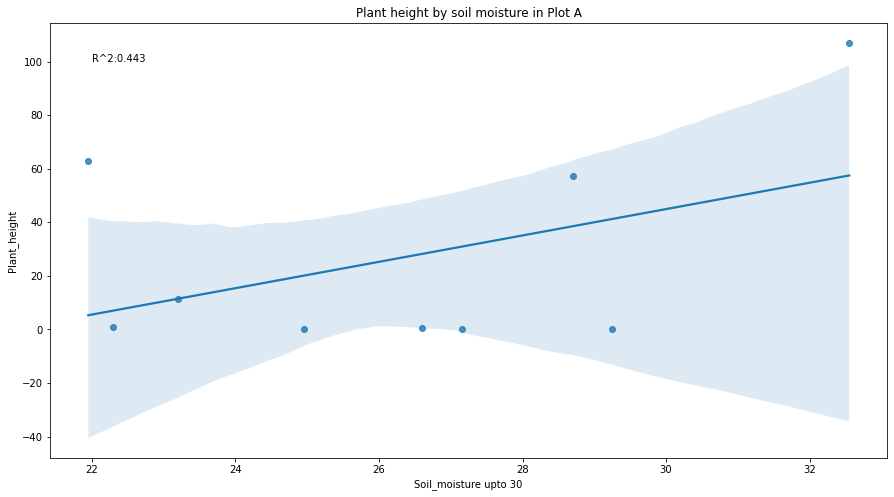

In [60]:
pearson_r = scipy.stats.pearsonr(a['Soil_moisture upto 30'], a.Plant_height)

plt.figure(figsize=(15,8))

sns.regplot(x='Soil_moisture upto 30', y='Plant_height', data=a)
plt.annotate(f'R^2:{pearson_r[0].round(3)}',(22,100))
plt.title('Plant height by soil moisture in Plot A')
plt.show()

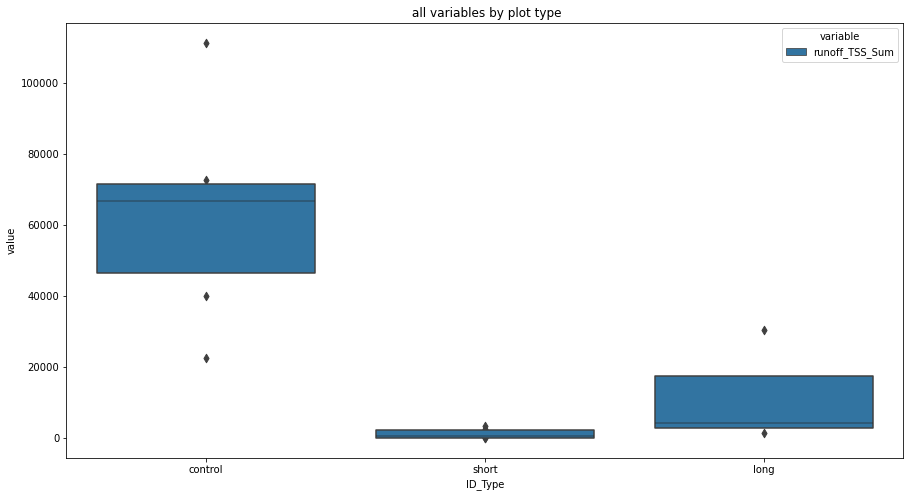

In [66]:
plt.figure(figsize=(15,8))
b_melted=pd.melt(data,id_vars='ID_Type',value_vars=['runoff_TSS_Sum'])
sns.boxenplot(x="ID_Type",y='value',hue='variable',data=b_melted,order=['control','short','long'])
plt.title(' all variables by plot type')
plt.show()